### The Assumptions of Linear Regression

**1. First, load the dataset from the weatherinszeged table from Thinkful's database.**<br/>
* Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.<br/>
* Now, check if your model meets the <u>Gauss-Markov</u> Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


In [2]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [6]:
X = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']]
Y = weather_df['temperature']

In [9]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 12 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:40:57   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lets check if the Gauss-Markov assumptions are met;

1. Assumption one: linearity of the model in its coefficients.<br/>
This assumption is automatically met because the OLS model assumes linearity.

2. Assumption two: the error term should be zero on average.

In [12]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
predictions = lrm.predict(X)
errors = Y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -6.374279891745197e-15


The mean is almost 0.Therefore assumption 2 is met.

3. Assumption three: homoscedasticity

In [13]:
from scipy.stats import bartlett
bart_stats = bartlett(predictions, errors)
print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0


we reject our null hypothesis that the errors' distribution is homoscedastic.to put it another way, errors are hetroscedastic.Therefore our linear regression assumption(Gauss-Markov) was not met.The reason can be outliers in our target variable or some of the other variables that we did not include in our model which might explain more the variance in the target variable. We can fix the problem through normalizing our target variable by transforming it using log or Box Cox transformations or adding important features or combatting outliers.

4. Assumption four: low multicollinearity

In [16]:
weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']].corr()

,humidity,windspeed,windbearing,pressure
humidity,1.000,-0.225,0.001,0.005
windspeed,-0.225,1.000,0.104,-0.049
windbearing,0.001,0.104,1.000,-0.012
pressure,0.005,-0.049,-0.012,1.000


Low multicollinearity aassumtion is met as the correlation values are low between the features from the above table.

5.Assumption five: error terms should be uncorrelated with one another

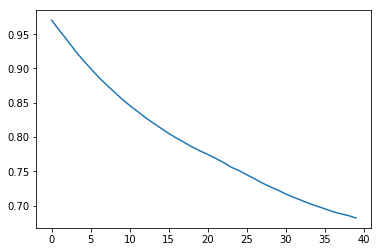

In [19]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
acf_data
plt.plot(acf_data[1:])
plt.show()

There is a very high autocorrelation between the erros.This implies that very important feature is omitted and needs to be added to correct this problem.Therefore this assumption is not met.

6. Assumption six: features shouldn't be correlated with the errors.

In [27]:
X['errors'] = errors
X.corr()

,const,humidity,windspeed,windbearing,pressure,errors
const,nan,nan,nan,nan,nan,nan
humidity,nan,1.000,-0.225,0.001,0.005,-0.000
windspeed,nan,-0.225,1.000,0.104,-0.049,0.000
windbearing,nan,0.001,0.104,1.000,-0.012,-0.000
pressure,nan,0.005,-0.049,-0.012,1.000,-0.000
errors,nan,-0.000,0.000,-0.000,-0.000,1.000


we can see that there is no any correlation between the errors and the features.Therefore assumption is met.

2. **House prices**<br/>
To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

 * Load the houseprices data from Thinkful's database.
 * Reimplement the model you built in the previous checkpoint.
 * Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
 * be sure to close the database connection after initially pulling in your data.

In [28]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host
                                                            ,postgres_port,postgres_db))
house_prices = pd.read_sql_query('select * from houseprices', con = engine)
engine.dispose()

In [29]:
house_prices.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [58]:
no_numeric_cols = house_prices.select_dtypes(['float64', 'int64']).columns
no_categ_cols = house_prices.select_dtypes(['object']).columns
print('number of categorical variables is: {}'.format(len(no_categ_cols)))
print('number of numeric variables is: {}'.format(len(no_numeric_cols)))

number of categorical variables is: 43
number of numeric variables is: 38


lets fit the model from previous assignment

In [74]:
house_prices['is_z_centralair'] = pd.get_dummies(house_prices.centralair, drop_first=True)
num_columns = ['overallqual','totalbsmtsf','firstflrsf','grlivarea','garagecars','garagearea']
num_columns.append('is_z_centralair')
X = house_prices[num_columns]
Y = house_prices['saleprice']

In [75]:
lrm1 = linear_model.LinearRegression()
lrm1.fit(X, Y)
predictions = lrm1.predict(X)
errors = Y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -7.543074962210981e-11


so now lets move on and check if the Gauss Markov conditions are met.

1. Assumption one: linearity of the model in its coefficients.<br/>
This assumption is automatically met because the OLS model assumes linearity.

2. Assumption two: the error term should be zero on average.

In [76]:
print('The mean of errors is: {}'.format(errors.mean()))

The mean of errors is: -7.543074962210981e-11


which is very close to zero,hence the assumption is met.

3. Assumption three: homoscedasticity

In [77]:
bart_stats = bartlett(predictions, errors)
print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))

Bartlett test statistic value is 473.046 and p value is 6.96e-105


the p-value is 0 which is less than 0.5,this makes us to reject the null hypothesis that the errors are homoscedastic.Therefore this assumption is not met.

4. Assumption four: low multicollinearity

In [78]:
house_prices[['overallqual','totalbsmtsf','firstflrsf','grlivarea'
             ,'garagecars','garagearea', 'is_z_centralair']].corr()

,overallqual,totalbsmtsf,firstflrsf,grlivarea,garagecars,garagearea,is_z_centralair
overallqual,1.000,0.538,0.476,0.593,0.601,0.562,0.272
totalbsmtsf,0.538,1.000,0.820,0.455,0.435,0.487,0.208
firstflrsf,0.476,0.820,1.000,0.566,0.439,0.490,0.147
grlivarea,0.593,0.455,0.566,1.000,0.467,0.469,0.094
garagecars,0.601,0.435,0.439,0.467,1.000,0.882,0.234
garagearea,0.562,0.487,0.490,0.469,0.882,1.000,0.231
is_z_centralair,0.272,0.208,0.147,0.094,0.234,0.231,1.000


from the above table we can see that there is high correlation between the features and we can understand that the assumption is not met.

5. Assumption five: error terms should be uncorrelated with one another

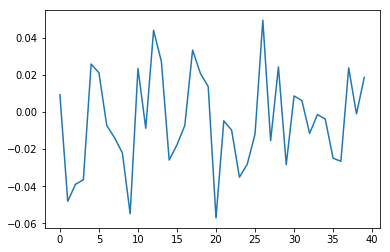

In [79]:
acf_data = acf(errors)
acf_data
plt.plot(acf_data[1:])
plt.show()

we can see that the error terms are not correlated and our assumption of no autocorrelation on the error terms is met.

6. Assumption six: features shouldn't be correlated with the errors

In [80]:
house_prices['errors'] = errors
house_prices[['overallqual','totalbsmtsf','firstflrsf','grlivarea'
             ,'garagecars','garagearea', 'is_z_centralair', 'errors']].corr()

,overallqual,totalbsmtsf,firstflrsf,grlivarea,garagecars,garagearea,is_z_centralair,errors
overallqual,1.000,0.538,0.476,0.593,0.601,0.562,0.272,-0.000
totalbsmtsf,0.538,1.000,0.820,0.455,0.435,0.487,0.208,-0.000
firstflrsf,0.476,0.820,1.000,0.566,0.439,0.490,0.147,0.000
grlivarea,0.593,0.455,0.566,1.000,0.467,0.469,0.094,-0.000
garagecars,0.601,0.435,0.439,0.467,1.000,0.882,0.234,-0.000
garagearea,0.562,0.487,0.490,0.469,0.882,1.000,0.231,0.000
is_z_centralair,0.272,0.208,0.147,0.094,0.234,0.231,1.000,-0.000
errors,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,1.000


There is no correlation between features and the errors in the modeled data.

Summary: out of the six Gauss-Markove's conditions of fitness of the model,5 are met.the only assumption which failed to satisfy the condition was the problem of multicollinearity between the features.We can use PCA in feature selection or we have to eliminate one of the correlated features because much of the variance can be explained by its correlated feature in predicting the outcome.And add another uncorrelated significant features.